<div id="toc"></div>

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
from sklearn import preprocessing, metrics, neighbors, cluster, pipeline, decomposition, feature_extraction
%matplotlib inline

# В качестве признаков - не абсолютное значение, а доля среднемесячных трат в категории к среднемесячному доходу

In [22]:
young_ordinary=pd.read_csv('young_ordinary.csv')
cif=pd.read_csv('cif_ordinary.csv')

In [ ]:
cif.head()

In [5]:
young_ordinary.head()

,Unnamed: 0,CU_MOB,parent_segment,parent_type,avg_salary,dc_c,dc_v,cc_c,cc_v,cashback_f,...,L.AUTO,L.MORT,L.PLOAN_rep,L.AURO_rep,L.MORT_rep,ip_f,active_months,trx_in_v,trx_in_month_num,salary
0,46,68,15874,49633,37539.664167,174,179015.49,0,0.0,0.0,...,0.0,0.0,5391.42,0.0,0.0,100739,12,605110.91,12,40249.231
1,94,66,27143,49633,89452.317917,569,371237.93,0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,100739,12,1709380.93,12,66738.256
2,104,68,32380,32380,25971.230000,138,69612.80,0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,100739,12,74223.59,12,0.000
3,162,68,32380,32380,32300.743333,42,33462.31,0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,100739,5,222971.78,12,0.000
4,236,67,32380,32380,18313.060000,544,313305.98,0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,100739,12,426070.00,12,0.000


In [23]:
with warn.catch_warnings():
        warn.simplefilter("ignore")
        cif.drop(['Unnamed: 0'], axis=1, inplace=True)
        young_ordinary.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
young_ordinary.isnull().any().any()

False

In [24]:
young_ordinary=cif.merge(young_ordinary,  left_index=True, right_index=True)

In [25]:
txn_cols_amount=young_ordinary.columns[17:68]
print(txn_cols_amount)

Index(['Accessories', 'Active rest', 'Alcohol and tobacco',
       'Audio, video, computers and appl', 'Auto parts', 'Autodillers',
       'Autoservices', 'Avia', 'Cinema', 'Clothes', 'Clothes and shoes',
       'Cosmetics', 'Furniture', 'Garden', 'Hotels and rent',
       'Legal, insurance and consulting', 'Maintenance and building', 'Office',
       'Other', 'Pharmacies', 'Railway transport', 'Restaurant', 'Sport',
       'Supermarkets', 'Advertising, design, photo, prin', 'Providers',
       'Shoes', 'Medical services', 'Pet shop', 'Beauty', 'Other services',
       'Postal services, delivery', 'Toys', 'Car rent', 'Filling station',
       'Music', 'Autotransport', 'Clothing,shoes and appliances re',
       'Duty free', 'Tourism', 'Theater', 'Art and literature', 'Housing',
       'Vet service', 'Kindergarten, baby sitters', 'Money orders',
       'Sea transport', 'Professional education', 'Home repair',
       'General education', 'Courses and trainings'],
      dtype='object')


In [26]:
txn_cols_count=young_ordinary.columns[68:119]
print(txn_cols_count)

Index(['Accessories_t', 'Active rest_t', 'Alcohol and tobacco_t',
       'Audio, video, computers_t', 'Auto parts_t', 'Autodillers_t',
       'Autoservices_t', 'Avia_t', 'Cinema_t', 'Clothes_t',
       'Clothes and shoes_t', 'Cosmetics_t', 'Furniture_t', 'Garden_t',
       'Hotels and rent_t', 'Legal, insurance_t', 'Maintenance and building_t',
       'Office_t', 'Other_t', 'Pharmacies_t', 'Railway transport_t',
       'Restaurant_t', 'Sport_t', 'Supermarkets_t', 'Advertising, design_t',
       'Providers_t', 'Shoes_t', 'Medical services_t', 'Pet shop_t',
       'Beauty_t', 'Other services_t', 'Postal services, delivery_t', 'Toys_t',
       'Car rent_t', 'Filling station_t', 'Music_t', 'Autotransport_t',
       'Clothing,appliances repair_t', 'Duty free_t', 'Tourism_t', 'Theater_t',
       'Art and literature_t', 'Housing_t', 'Vet service_t',
       'Kindergarten, baby sitters_t', 'Money orders_t', 'Sea transport_t',
       'Professional education_t', 'Home repair_t', 'General educatio

In [27]:
atm_cols=young_ordinary.columns[119:142]
print(atm_cols)

Index(['atm_t', 'c2c_rconnect_t', 'c2c_other_t', 'c2c_atm_t', 'branch_t',
       'ATM', 'C2C_RCONNECT', 'C2C_OTHER', 'C2C_ATM', 'BRANCH', 'atm_o_t',
       'c2c_rconnect_o_t', 'c2c_other_o_t', 'bills_atm_o_t', 'c2c_atm_o_t',
       'bills_rconnect_o_t', 'branch_o_t', 'c2c_rconnect_o', 'c2c_other_o',
       'bills_atm_o', 'c2c_atm_o', 'bills_rconnect_o', 'branch_o'],
      dtype='object')


In [28]:
prod_cols=young_ordinary.columns[142:160]
print(prod_cols)

Index(['IND_PAYROLL_F', 'CAPTIVE_BANK_F', 'month_num_dep', 'avg_amount_dep',
       'month_num_mut', 'month_num_ins', 'month_num_sa', 'avg_amount_sa',
       'month_num_gold', 'month_num_prem_dir', 'month_num_prem', 'L.PLOAN',
       'L.AUTO', 'L.MORT', 'L.PLOAN_rep', 'L.AURO_rep', 'L.MORT_rep', 'ip_f'],
      dtype='object')


## Отберём клиентов Mass и LowerMass  с доходом 22-35 тыс

In [9]:
young_ordinary['cu_segment'].unique()

array([49428, 13101, 35844,  2729])

In [10]:
affluent=young_ordinary[((young_ordinary['cu_segment']==13101)|(young_ordinary['cu_segment']==2729)) & (young_ordinary['salary']>=35000) & (young_ordinary['salary']<=66000)]

In [29]:
young_ordinary=young_ordinary[((young_ordinary['cu_segment']==49428)|(young_ordinary['cu_segment']==35844)) & (young_ordinary['salary']>=22000) & (young_ordinary['salary']<=35000)]

In [48]:
affluent.shape

(4148, 164)

In [30]:
young_ordinary.shape

(15507, 164)

## Не даём модели информацию о доходах и тратах в абсолютных значениях. Смотрим на долю, которую составляют траты в категории от дохода

In [12]:
def shares(data, txn_cols_amount, txn_cols_count):
       #перейдём к среднемесячным тратам, т.к. клиенты были активны на протяжении разного времени
        data.ix[:,txn_cols_amount]=data.ix[:,txn_cols_amount].div(data.ix[:,'active_months'], axis='index')
        data.ix[:,'trx_in_v']=data.ix[:,'trx_in_v'].div(data.ix[:,'trx_in_month_num'], axis='index')  
    
       #перейдём к долям по количеству транзакций
        data.ix[:,txn_cols_count]=data.ix[:,txn_cols_count].div(data.ix[:,'dc_c'], axis='index')
        data.ix[:,['atm_t', 'c2c_rconnect_t', 'c2c_other_t', 'c2c_atm_t', 'branch_t',
                         'atm_o_t','c2c_rconnect_o_t', 'c2c_other_o_t', 'bills_atm_o_t', 'c2c_atm_o_t',
                         'bills_rconnect_o_t', 'branch_o_t']]=data.ix[:,['atm_t', 'c2c_rconnect_t', 'c2c_other_t', 'c2c_atm_t', 'branch_t',
                         'atm_o_t','c2c_rconnect_o_t', 'c2c_other_o_t', 'bills_atm_o_t', 'c2c_atm_o_t',
                         'bills_rconnect_o_t', 'branch_o_t']].div(data.ix[:,'trx_in_month_num'], axis='index')
        #преобразуем в доли от дохода
        data.ix[:,txn_cols_amount]=data.ix[:,txn_cols_amount].div(data.ix[:,'salary'], axis='index')
        data.ix[:,['ATM', 'C2C_RCONNECT', 'C2C_OTHER', 'C2C_ATM', 'BRANCH', 
                         'c2c_rconnect_o', 'c2c_other_o','bills_atm_o', 'c2c_atm_o', 'bills_rconnect_o', 'branch_o']]=data.ix[:,['ATM', 'C2C_RCONNECT', 'C2C_OTHER', 'C2C_ATM', 'BRANCH', 
                         'c2c_rconnect_o', 'c2c_other_o','bills_atm_o', 'c2c_atm_o', 'bills_rconnect_o', 'branch_o']].div(data.ix[:,'salary'], axis='index')
        data.ix[:,['L.PLOAN_rep', 'L.AURO_rep', 'L.MORT_rep']]=data.ix[:,['L.PLOAN_rep', 'L.AURO_rep', 'L.MORT_rep']].div(data.ix[:,'salary'], axis='index')
        data.drop(['trx_in_v'], axis=1, inplace=True)
        
        #продуктовая история - уходим от абсолютных значений 
        data.ix[:,['month_num_dep', 'month_num_mut', 'month_num_ins',
                        'month_num_sa', 'month_num_gold', 'month_num_prem_dir',
                        'month_num_prem', 'L.PLOAN', 'L.AUTO', 'L.MORT']]=data.ix[:,['month_num_dep', 'month_num_mut', 'month_num_ins',
                        'month_num_sa', 'month_num_gold', 'month_num_prem_dir',
                        'month_num_prem', 'L.PLOAN', 'L.AUTO', 'L.MORT']].div(young_ordinary_avg.ix[:,'active_months'], axis='index')
        data.ix[:,'payroll_m']=data.ix[:,'payroll_m'].div(data.ix[:,'active_months'], axis='index')
        
        data.drop(['avg_salary', 'salary','avg_amount_sa', 'avg_amount_dep'], axis=1, inplace=True)
        
        
        data.drop(['active_months', 'trx_in_month_num'], axis=1, inplace=True)
        
        data['dc_v']=data['dc_v'].div(data['dc_v']+data['cc_v'], axis='index')
        data['cc_v']=data['cc_v'].div(data['dc_v']+data['cc_v'], axis='index')
        
        data['dc_c']=data['dc_c'].div(data['dc_c']+data['cc_c'], axis='index')
        data['cc_c']=data['cc_c'].div(data['dc_c']+data['cc_c'], axis='index')
        
        cif_avg=data.CIF_ID
        data.drop('CIF_ID', axis=1, inplace=True)
        data.drop('cu_segment', axis=1, inplace=True)
        data.drop(['Supermarkets', 'Restaurant', 'Other','Supermarkets_t', 'Restaurant_t', 'Other_t' ], axis=1, inplace=True)
        return data

In [13]:
f=shares(young_ordinary_avg, txn_cols_amount, txn_cols_count)

NameError: name 'young_ordinary_avg' is not defined

In [ ]:
f.shape

In [31]:
young_ordinary=young_ordinary[young_ordinary['dc_c'].div(young_ordinary['active_months'], axis='index')>=6]
affluent=affluent[affluent['dc_c'].div(affluent['active_months'], axis='index')>=6]

In [15]:
young_ordinary.shape

(13196, 164)

In [32]:
young_ordinary_avg=young_ordinary.copy().reset_index(drop=True)
young_ordinary_avg=young_ordinary_avg[(young_ordinary_avg['salary']>0)&(young_ordinary_avg['dc_c']>0)]

In [53]:
affluent=affluent.copy().reset_index(drop=True)
affluent=affluent[(affluent['salary']>0)&(affluent['dc_c']>0)]

In [33]:
young_ordinary_avg.shape

(13196, 164)

In [59]:
affluent.shape

(3914, 163)

In [34]:
#информация о тратах на еду не несёт пользы
#young_ordinary_avg['salary_ost']=young_ordinary_avg['salary']-young_ordinary_avg['Supermarkets']-young_ordinary_avg['Restaurant']-young_ordinary_avg['Other']
#young_ordinary_avg['dc_c']=young_ordinary_avg['dc_c']-young_ordinary_avg['Supermarkets_t']-young_ordinary_avg['Restaurant_t']-young_ordinary_avg['Other_t']
young_ordinary_avg.drop(['Supermarkets', 'Restaurant', 'Other','Supermarkets_t', 'Restaurant_t', 'Other_t' ], axis=1, inplace=True)

In [ ]:
affluent.drop(['Supermarkets', 'Restaurant', 'Other','Supermarkets_t', 'Restaurant_t', 'Other_t' ], axis=1, inplace=True)

In [ ]:
#young_ordinary_avg=young_ordinary_avg[(young_ordinary_avg['salary_ost']>0)&(young_ordinary_avg['dc_c']>0)]


In [35]:
txn_cols_amount=young_ordinary_avg.columns[17:65]
print(txn_cols_amount)

Index(['Accessories', 'Active rest', 'Alcohol and tobacco',
       'Audio, video, computers and appl', 'Auto parts', 'Autodillers',
       'Autoservices', 'Avia', 'Cinema', 'Clothes', 'Clothes and shoes',
       'Cosmetics', 'Furniture', 'Garden', 'Hotels and rent',
       'Legal, insurance and consulting', 'Maintenance and building', 'Office',
       'Pharmacies', 'Railway transport', 'Sport',
       'Advertising, design, photo, prin', 'Providers', 'Shoes',
       'Medical services', 'Pet shop', 'Beauty', 'Other services',
       'Postal services, delivery', 'Toys', 'Car rent', 'Filling station',
       'Music', 'Autotransport', 'Clothing,shoes and appliances re',
       'Duty free', 'Tourism', 'Theater', 'Art and literature', 'Housing',
       'Vet service', 'Kindergarten, baby sitters', 'Money orders',
       'Sea transport', 'Professional education', 'Home repair',
       'General education', 'Courses and trainings'],
      dtype='object')


In [36]:
txn_cols_count=young_ordinary_avg.columns[65:113]
print(txn_cols_count)

Index(['Accessories_t', 'Active rest_t', 'Alcohol and tobacco_t',
       'Audio, video, computers_t', 'Auto parts_t', 'Autodillers_t',
       'Autoservices_t', 'Avia_t', 'Cinema_t', 'Clothes_t',
       'Clothes and shoes_t', 'Cosmetics_t', 'Furniture_t', 'Garden_t',
       'Hotels and rent_t', 'Legal, insurance_t', 'Maintenance and building_t',
       'Office_t', 'Pharmacies_t', 'Railway transport_t', 'Sport_t',
       'Advertising, design_t', 'Providers_t', 'Shoes_t', 'Medical services_t',
       'Pet shop_t', 'Beauty_t', 'Other services_t',
       'Postal services, delivery_t', 'Toys_t', 'Car rent_t',
       'Filling station_t', 'Music_t', 'Autotransport_t',
       'Clothing,appliances repair_t', 'Duty free_t', 'Tourism_t', 'Theater_t',
       'Art and literature_t', 'Housing_t', 'Vet service_t',
       'Kindergarten, baby sitters_t', 'Money orders_t', 'Sea transport_t',
       'Professional education_t', 'Home repair_t', 'General education_t',
       'Courses and trainings_t'],
    

In [37]:
#перейдём к среднемесячным тратам, т.к. клиенты были активны на протяжении разного времени
young_ordinary_avg.ix[:,txn_cols_amount]=young_ordinary_avg.ix[:,txn_cols_amount].div(young_ordinary_avg.ix[:,'active_months'], axis='index')
young_ordinary_avg.ix[:,'trx_in_v']=young_ordinary_avg.ix[:,'trx_in_v'].div(young_ordinary_avg.ix[:,'trx_in_month_num'], axis='index')              

In [38]:
#перейдём к среднемесячным тратам, т.к. клиенты были активны на протяжении разного времени
affluent.ix[:,txn_cols_amount]=affluent.ix[:,txn_cols_amount].div(affluent.ix[:,'active_months'], axis='index')
affluent.ix[:,'trx_in_v']=affluent.ix[:,'trx_in_v'].div(affluent.ix[:,'trx_in_month_num'], axis='index')          

In [39]:
#перейдём к долям по количеству транзакций
young_ordinary_avg.ix[:,txn_cols_count]=young_ordinary_avg.ix[:,txn_cols_count].div(young_ordinary_avg.ix[:,'dc_c'], axis='index')
young_ordinary_avg.ix[:,['atm_t', 'c2c_rconnect_t', 'c2c_other_t', 'c2c_atm_t', 'branch_t',
                         'atm_o_t','c2c_rconnect_o_t', 'c2c_other_o_t', 'bills_atm_o_t', 'c2c_atm_o_t',
                         'bills_rconnect_o_t', 'branch_o_t']]=young_ordinary_avg.ix[:,['atm_t', 'c2c_rconnect_t', 'c2c_other_t', 'c2c_atm_t', 'branch_t',
                         'atm_o_t','c2c_rconnect_o_t', 'c2c_other_o_t', 'bills_atm_o_t', 'c2c_atm_o_t',
                         'bills_rconnect_o_t', 'branch_o_t']].div(young_ordinary_avg.ix[:,'trx_in_month_num'], axis='index')

In [ ]:
#перейдём к долям по количеству транзакций
affluent.ix[:,txn_cols_count]=affluent.ix[:,txn_cols_count].div(affluent.ix[:,'dc_c'], axis='index')
affluent.ix[:,['atm_t', 'c2c_rconnect_t', 'c2c_other_t', 'c2c_atm_t', 'branch_t',
                         'atm_o_t','c2c_rconnect_o_t', 'c2c_other_o_t', 'bills_atm_o_t', 'c2c_atm_o_t',
                         'bills_rconnect_o_t', 'branch_o_t']]=affluent.ix[:,['atm_t', 'c2c_rconnect_t', 'c2c_other_t', 'c2c_atm_t', 'branch_t',
                         'atm_o_t','c2c_rconnect_o_t', 'c2c_other_o_t', 'bills_atm_o_t', 'c2c_atm_o_t',
                         'bills_rconnect_o_t', 'branch_o_t']].div(affluent.ix[:,'trx_in_month_num'], axis='index')

In [40]:
#преобразуем в доли от дохода
young_ordinary_avg.ix[:,txn_cols_amount]=young_ordinary_avg.ix[:,txn_cols_amount].div(young_ordinary_avg.ix[:,'salary'], axis='index')
young_ordinary_avg.ix[:,['ATM', 'C2C_RCONNECT', 'C2C_OTHER', 'C2C_ATM', 'BRANCH', 
                         'c2c_rconnect_o', 'c2c_other_o','bills_atm_o', 'c2c_atm_o', 'bills_rconnect_o', 'branch_o']]=young_ordinary_avg.ix[:,['ATM', 'C2C_RCONNECT', 'C2C_OTHER', 'C2C_ATM', 'BRANCH', 
                         'c2c_rconnect_o', 'c2c_other_o','bills_atm_o', 'c2c_atm_o', 'bills_rconnect_o', 'branch_o']].div(young_ordinary_avg.ix[:,'salary'], axis='index')
young_ordinary_avg.ix[:,['L.PLOAN_rep', 'L.AURO_rep', 'L.MORT_rep']]=young_ordinary_avg.ix[:,['L.PLOAN_rep', 'L.AURO_rep', 'L.MORT_rep']].div(young_ordinary_avg.ix[:,'salary'], axis='index')
young_ordinary_avg.drop(['trx_in_v'], axis=1, inplace=True)

In [ ]:
#преобразуем в доли от дохода
affluent.ix[:,txn_cols_amount]=affluent.ix[:,txn_cols_amount].div(affluent.ix[:,'salary'], axis='index')
affluent.ix[:,['ATM', 'C2C_RCONNECT', 'C2C_OTHER', 'C2C_ATM', 'BRANCH', 
                         'c2c_rconnect_o', 'c2c_other_o','bills_atm_o', 'c2c_atm_o', 'bills_rconnect_o', 'branch_o']]=affluent.ix[:,['ATM', 'C2C_RCONNECT', 'C2C_OTHER', 'C2C_ATM', 'BRANCH', 
                         'c2c_rconnect_o', 'c2c_other_o','bills_atm_o', 'c2c_atm_o', 'bills_rconnect_o', 'branch_o']].div(affluent.ix[:,'salary'], axis='index')
affluent.ix[:,['L.PLOAN_rep', 'L.AURO_rep', 'L.MORT_rep']]=affluent.ix[:,['L.PLOAN_rep', 'L.AURO_rep', 'L.MORT_rep']].div(affluent.ix[:,'salary'], axis='index')
affluent.drop(['trx_in_v'], axis=1, inplace=True)

In [41]:
#продуктовая история - уходим от абсолютных значений 
young_ordinary_avg.ix[:,['month_num_dep', 'month_num_mut', 'month_num_ins',
                        'month_num_sa', 'month_num_gold', 'month_num_prem_dir',
                        'month_num_prem', 'L.PLOAN', 'L.AUTO', 'L.MORT']]=young_ordinary_avg.ix[:,['month_num_dep', 'month_num_mut', 'month_num_ins',
                        'month_num_sa', 'month_num_gold', 'month_num_prem_dir',
                        'month_num_prem', 'L.PLOAN', 'L.AUTO', 'L.MORT']].div(young_ordinary_avg.ix[:,'active_months'], axis='index')
young_ordinary_avg.ix[:,'payroll_m']=young_ordinary_avg.ix[:,'payroll_m'].div(young_ordinary_avg.ix[:,'active_months'], axis='index')

In [ ]:
#продуктовая история - уходим от абсолютных значений 
affluent.ix[:,['month_num_dep', 'month_num_mut', 'month_num_ins',
                        'month_num_sa', 'month_num_gold', 'month_num_prem_dir',
                        'month_num_prem', 'L.PLOAN', 'L.AUTO', 'L.MORT']]=affluent.ix[:,['month_num_dep', 'month_num_mut', 'month_num_ins',
                        'month_num_sa', 'month_num_gold', 'month_num_prem_dir',
                        'month_num_prem', 'L.PLOAN', 'L.AUTO', 'L.MORT']].div(affluent.ix[:,'active_months'], axis='index')
affluent.ix[:,'payroll_m']=affluent.ix[:,'payroll_m'].div(affluent.ix[:,'active_months'], axis='index')

In [42]:
young_ordinary_avg.drop(['avg_salary', 'salary','avg_amount_sa', 'avg_amount_dep'], axis=1, inplace=True)
affluent.drop(['avg_salary', 'salary','avg_amount_sa', 'avg_amount_dep'], axis=1, inplace=True)

In [43]:
young_ordinary_avg.drop(['active_months', 'trx_in_month_num'], axis=1, inplace=True)
affluent.drop(['active_months', 'trx_in_month_num'], axis=1, inplace=True)

In [44]:
young_ordinary_avg['dc_v']=young_ordinary_avg['dc_v'].div(young_ordinary_avg['dc_v']+young_ordinary_avg['cc_v'], axis='index')
young_ordinary_avg['cc_v']=young_ordinary_avg['cc_v'].div(young_ordinary_avg['dc_v']+young_ordinary_avg['cc_v'], axis='index')

In [45]:
affluent['dc_v']=affluent['dc_v'].div(affluent['dc_v']+affluent['cc_v'], axis='index')
affluent['cc_v']=affluent['cc_v'].div(affluent['dc_v']+affluent['cc_v'], axis='index')

In [46]:
young_ordinary_avg['dc_c']=young_ordinary_avg['dc_c'].div(young_ordinary_avg['dc_c']+young_ordinary_avg['cc_c'], axis='index')
young_ordinary_avg['cc_c']=young_ordinary_avg['cc_c'].div(young_ordinary_avg['dc_c']+young_ordinary_avg['cc_c'], axis='index')

In [47]:
affluent['dc_c']=affluent['dc_c'].div(affluent['dc_c']+affluent['cc_c'], axis='index')
affluent['cc_c']=affluent['cc_c'].div(affluent['dc_c']+affluent['cc_c'], axis='index')

In [48]:
cif_avg=young_ordinary_avg.CIF_ID
young_ordinary_avg.drop('CIF_ID', axis=1, inplace=True)

In [ ]:
cif_aff=affluent.CIF_ID
affluent.drop('CIF_ID', axis=1, inplace=True)

In [49]:
young_ordinary_avg.drop('cu_segment', axis=1, inplace=True)

In [ ]:
affluent.drop('cu_segment', axis=1, inplace=True)

In [56]:
young_ordinary_avg=shares(young_ordinary_avg, txn_cols_amount, txn_cols_count)

In [50]:
young_ordinary_avg.shape

(13196, 149)

In [61]:
affluent.columns

Index(['CIF_ID', 'CU_MOB', 'parent_segment', 'parent_type', 'avg_salary',
       'dc_c', 'dc_v', 'cc_c', 'cc_v', 'cashback_f',
       ...
       'L.PLOAN', 'L.AUTO', 'L.MORT', 'L.PLOAN_rep', 'L.AURO_rep',
       'L.MORT_rep', 'ip_f', 'active_months', 'trx_in_month_num', 'salary'],
      dtype='object', length=163)

In [60]:
affluent=shares(affluent, txn_cols_amount, txn_cols_count)

KeyError: 'trx_in_v'

In [ ]:
affluent.shape

In [ ]:
prod_cols=young_ordinary_avg.columns[133:149]
print(prod_cols)

In [ ]:
#уберём продуктовую историю
#young_ordinary_avg=young_ordinary_avg.ix[:,:133]

In [ ]:
#уберём соц-дем
#personal_features=['CU_AGE', 'CU_CITIZENSHIP',
       'CU_GENDER', 'CU_MARITAL_STATUS', 'CU_BRANCH_CITY_TOWN', 'parent_segment', 'parent_type']
#other=list(set(young_ordinary_avg.columns)-set(personal_features))
#young_ordinary_avg=young_ordinary_avg[other]

## Корреляция в тратах

In [ ]:
for i,col in enumerate(txn_cols_amount.tolist()) :
    other= txn_cols_amount.tolist()[i:48]
    other.remove(col)
    for another in other:
        if pd.DataFrame(young_ordinary_avg[col]).corrwith(young_ordinary_avg[another])[0]>0.5:
             print (col,'   ',  another,'   ',   pd.DataFrame(young_ordinary_avg[col]).corrwith(young_ordinary_avg[another])[0])

In [ ]:
def corr(data, cols, threshhold):
    other=cols.tolist()
    for i,col in enumerate(cols.tolist()) :
        other.remove(col)
        for another in other:
            corr=pd.DataFrame(data[col]).corrwith(data[another])[0]
            if corr>threshhold:
                print (col,'   ',  another,'   ',  corr)

In [ ]:
class ClusterAnalysis:
    
    def __init__(self, X):
        self.data = X
    
    def corr(self,  cols, threshhold):
            other=cols.tolist()
            for i,col in enumerate(cols.tolist()) :
                other.remove(col)
                for another in other:
                    corr=pd.DataFrame(self.data[col]).corrwith(self.data[another])[0]
                    if corr>threshhold:
                        print (col,'   ',  another,'   ',  corr)
                

In [ ]:
a=ClusterAnalysis(young_ordinary_avg)

In [ ]:
a.corr(txn_cols_amount, 0.3)

In [ ]:
corr(young_ordinary_avg, txn_cols_amount, 0.2)

In [ ]:
for i,col in enumerate(txn_cols_count.tolist()) :
    other= txn_cols_count.tolist()[i:48]
    other.remove(col)
    for another in other:
        if pd.DataFrame(young_ordinary_avg[col]).corrwith(young_ordinary_avg[another])[0]>0.5:
             print (col,'   ',  another,'   ',   pd.DataFrame(young_ordinary_avg[col]).corrwith(young_ordinary_avg[another])[0])

## Пробуем one-hot encoding для категориальных

In [ ]:
def preprocess_diff_types(data, svd_n_comp):
    
    cat_cols=['parent_segment', 'parent_type', 'cashback_f', 'CU_CITIZENSHIP', 'CU_BRANCH_CITY_TOWN',
             'IND_PAYROLL_F', 'CAPTIVE_BANK_F','ip_f']
    cat_indices = np.array([(column in cat_cols) for column in data.columns], dtype = bool)
    
    bin_cols=['CU_GENDER', 'CU_MARITAL_STATUS']
    bin_indices = np.array([(column in bin_cols) for column in data.columns], dtype = bool)
    
    real_cols=list(set(data.columns)-set(cat_cols)-set(bin_cols))
    real_indices = np.array([(column in real_cols) for column in data.columns], dtype = bool)
    
    transform=pipeline.Pipeline(steps = [
        ('feature_processing',   pipeline.FeatureUnion(transformer_list = [
            
            ('binary', preprocessing.FunctionTransformer(lambda data: data[:, bin_indices])),
            
            ('real', pipeline.Pipeline(steps = [
                        ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, real_indices])),
                        ('scaling', preprocessing.StandardScaler(with_mean=0))
                         ])),
            ('categorical', pipeline.Pipeline(steps = [
                        ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, cat_indices])),
                        ('one_hot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
                        ]))
                   
                        
                    ])),
        ('svd', decomposition.TruncatedSVD(svd_n_comp,random_state=1))
         ])
    X = transform.fit_transform(data)
    return X 

In [ ]:
a=preprocess_diff_types(young_ordinary_avg, 80)

In [ ]:
young_ordinary_avg.columns[:20]

In [51]:
cat_features=['parent_segment', 'parent_type', 'cashback_f', 'CU_CITIZENSHIP', 'CU_GENDER', 'CU_MARITAL_STATUS', 'CU_BRANCH_CITY_TOWN',
             'IND_PAYROLL_F', 'CAPTIVE_BANK_F','ip_f']
real_features=list(set(young_ordinary_avg.columns)-set(cat_features))

In [52]:
scaler=preprocessing.StandardScaler(with_mean=0)
data=young_ordinary_avg.copy()
data[real_features]=scaler.fit_transform(data[real_features])

In [53]:
mask=young_ordinary_avg.columns.isin(cat_features)

In [54]:
encoder=preprocessing.OneHotEncoder(categorical_features=mask)
young_enc=encoder.fit_transform(data)

In [55]:
young_enc.shape

(13196, 228)

## Уменьшение размерности

В целях избавления от незначимых, сильно разреженных признаков уменьшим размерность

Не центрируем, чтобы сохранить sparse формат 

In [56]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
young_ordinary_avg.head()

,CU_MOB,parent_segment,parent_type,dc_c,dc_v,cc_c,cc_v,cashback_f,payroll_m,CU_AGE,...,month_num_gold,month_num_prem_dir,month_num_prem,L.PLOAN,L.AUTO,L.MORT,L.PLOAN_rep,L.AURO_rep,L.MORT_rep,ip_f
0,67,27143,49633,1.0,1.0,0.0,0.0,0.0,1.000000,23.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,100739
1,67,27143,49633,1.0,1.0,0.0,0.0,0.0,1.000000,24.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,100739
2,67,15874,49633,1.0,1.0,0.0,0.0,0.0,1.000000,25.0,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.407456,0.0,0.0,100739
3,67,20366,11016,1.0,1.0,0.0,0.0,0.0,1.000000,25.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,100739
4,67,20366,49633,1.0,1.0,0.0,0.0,0.0,0.454545,24.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,100739


In [58]:
svd = TruncatedSVD(80, random_state=1)
scaler=StandardScaler(with_mean=0)
lsa = make_pipeline(scaler,svd)

X = lsa.fit_transform(young_ordinary_avg)

In [59]:
#для one-hot
svd = TruncatedSVD(80, random_state=1)
X=svd.fit_transform(young_enc)

In [ ]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=80)
#young_pca=pca.fit_transform(young_ord_scaled)

##  Алгоритм: hierarchy

Результаты других функций связи и метрик неудовлетворительны - объединяют все в один кластер

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [61]:
Z = linkage(X, method='ward')

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
def linkage_and_params(fn):
    def  wrapper(Z,truncate_mode='lastp', p=30,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,annotate_above=10 ):
        Z=linkage(Z, 'ward')
        ddata = fn(Z,truncate_mode='lastp', p=30,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,annotate_above=10)
        plt.show()
    return wrapper  

In [ ]:
@linkage_and_params
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


In [ ]:
fancy_dendrogram(X)

In [ ]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [62]:
h_labels=fcluster(Z, 164 , criterion='distance')

In [ ]:
def cluster_labels(X, threshold):
    Z = linkage(X, method='ward')
    h_labels=fcluster(Z, threshold , criterion='distance')
    final=young_ordinary_avg.copy()
    final['final_labels']=h_labels
    unique_labels=final['final_labels'].value_counts().index.tolist()
    final.final_labels.replace(unique_labels,[i+1 for i in range(len(unique_labels))],inplace=True)
    return final

In [ ]:
final=cluster_labels(X, 164)

In [63]:
final=young_ordinary_avg.copy()
final['final_labels']=h_labels

In [66]:
final['final_labels'].value_counts()

1     6020
2     3167
3     1847
4     1806
5      265
6       29
7       24
8       20
9        5
12       4
11       4
10       4
13       1
Name: final_labels, dtype: int64

In [65]:
final.final_labels.replace([11,6,5,2,12,10,1,8,4,7,3,9,13],range(14)[1:],inplace=True)

In [ ]:
pd.DataFrame(cif_avg).merge(final, left_index=True, right_index=True).to_csv('young_train.csv')

## Проверка значимости

In [ ]:
def kruskalwallis(columns, data, affect_feature):
    amount_cols_stat=[]
    print ("Reject NULL hypothesis - Significant difference between groups.")

    for c in columns:   
        cols=[]
        for i in data[affect_feature].unique():
            cols.append(data.ix[data[affect_feature]==i, c])
        try:
            H, pval = sc.stats.mstats.kruskalwallis(cols[0],cols[1],cols[2],cols[3])
            if pval < 0.05:
                amount_cols_stat.append(c)
                #print (c)
        except ValueError:
            pass
    return amount_cols_stat
           

In [ ]:
kruskalwallis(['month_num_dep', 'month_num_mut', 'month_num_ins',
                        'month_num_sa', 'month_num_gold', 'month_num_prem_dir',
                        'month_num_prem', 'L.PLOAN', 'L.AUTO', 'L.MORT'], final[final['final_labels']<4], 'final_labels')

In [ ]:
#переделать-final['final_labels'].unique()
def mannwhitneyu(columns, data, k, l, alt,affect_feature):
    print ("Reject NULL hypothesis - Significant difference between groups.")
    for c in columns:
        #X=final[final[c]!=0]
        #X_1=X[c].quantile(0.25)-1.5*(X[c].quantile(0.75)-X[c].quantile(0.25))
        #X_2=X[c].quantile(0.75)+1.5*(X[c].quantile(0.75)-X[c].quantile(0.25))
        #X=X[(X[c]>X_1)&(X[c]<X_2)]
        cols=[]
        for i in data[affect_feature].unique():
            cols.append(data.ix[data[affect_feature]==i, c])
        try:
            H, pval = sc.stats.mannwhitneyu(cols[k],cols[l],alternative=alt)
            if pval < 0.05:
                print (c)
        except ValueError:
            pass
       

In [ ]:
print ("Reject NULL hypothesis - Significant difference between groups.")
for c in txn_cols_amount:
        #X=final[final[c]!=0]
        #X_1=X[c].quantile(0.25)-1.5*(X[c].quantile(0.75)-X[c].quantile(0.25))
        #X_2=X[c].quantile(0.75)+1.5*(X[c].quantile(0.75)-X[c].quantile(0.25))
        #X=X[(X[c]>X_1)&(X[c]<X_2)]
        cols=[]
        for i in range(4):
            cols.append(final.ix[final['final_labels']==i, c])
        try:
            H, pval = sc.stats.mannwhitneyu(cols[1],cols[0],alternative='less')
            if pval < 0.05:
                print (c)
        except ValueError:
            pass

In [ ]:
mannwhitneyu(txn_cols_amount, final, 0, 2, 'less', 'final_labels')

In [ ]:
mannwhitneyu(prod_cols, final, 2, 3, 'greater', 'final_labels')

In [ ]:
def anova(columns, data, affect_feature):
    print ("Reject NULL hypothesis - Significant difference between groups.")
    for c in columns:
        cols=[]
        for i in data[affect_feature].unique():
            cols.append(data.ix[data[affect_feature]==i, c])
        H, pval = sc.stats.f_oneway(cols[0],cols[1],cols[2],cols[3])

        if pval < 0.05:
            print (c)
        

In [ ]:
anova(txn_cols_amount, final, 'final_labels')

# Аналитика

## Структура соц-дем

Вернемся от кодировки к исходным значениям

In [ ]:
young_raw=pd.read_csv('dataset_2306.csv')

In [ ]:
young_raw=young_raw[young_raw.CIF_ID.isin(cif_avg)]

In [ ]:
young_raw.shape

In [ ]:
cat_bin_cols=[  'parent_segment', 'parent_type','CU_MARITAL_STATUS','CU_CITIZENSHIP', 'CU_GENDER', 'CU_BRANCH_CITY_TOWN', 'cu_segment']

In [ ]:
data_city=young_raw.copy()

In [ ]:
data_city['city']='other'
with warn.catch_warnings():
        warn.simplefilter("ignore")

        data_city.ix[data_city['CU_BRANCH_CITY_TOWN']=='Moscow','city']='Moscow'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='St.Peterburg'].index.tolist(),'city']='St.Peterburg'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Saint-Petersburg'].index.tolist(),'city']='St.Peterburg'

        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Samara'].index.tolist(),'city']='big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Nizhny Novgorod'].index.tolist(),'city']='big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Ekaterinburg'].index.tolist(),'city']= 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Kazan'].index.tolist(),'city']= 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Krasnoyarsk'].index.tolist(),'city']= 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Ufa'].index.tolist(),'city']= 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Omsk'].index.tolist(),'city']='big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Volgograd'].index.tolist(),'city']= 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Voronezh'].index.tolist(),'city']= 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Rostov-na-Donu'].index.tolist(),'city']= 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Volgograd'].index.tolist(),'city'] = 'big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Novosibirsk'].index.tolist(),'city']='big_city'
        data_city.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Chelyabinsk'].index.tolist(),'city'] = 'big_city'

In [ ]:
def city(data, city_col):
        data['city']='other'
        with warn.catch_warnings():
            warn.simplefilter("ignore")

            data.ix[data[city_col]=='Moscow','city']='Moscow'
            data.ix[data[data[city_col]=='St.Peterburg'].index.tolist(),'city']='St.Peterburg'
            data.ix[data[data[city_col]=='Saint-Petersburg'].index.tolist(),'city']='St.Peterburg'

            data.ix[data[data[city_col]=='Samara'].index.tolist(),'city']='big_city'
            data.ix[data[data_city[city_col]=='Nizhny Novgorod'].index.tolist(),'city']='big_city'
            data.ix[data[data_city[city_col]=='Ekaterinburg'].index.tolist(),'city']= 'big_city'
            data.ix[data[data_city[city_col]=='Kazan'].index.tolist(),'city']= 'big_city'
            data.ix[data[data_city[city_col]=='Krasnoyarsk'].index.tolist(),'city']= 'big_city'
            data.ix[data[data_city[city_col]=='Ufa'].index.tolist(),'city']= 'big_city'
            data.ix[data[data_city[city_col]=='Omsk'].index.tolist(),'city']='big_city'
            data.ix[data[data_city[city_col]=='Volgograd'].index.tolist(),'city']= 'big_city'
            data.ix[data[data_city[city_col]=='Voronezh'].index.tolist(),'city']= 'big_city'
            data.ix[data[data_city[city_col]=='Rostov-na-Donu'].index.tolist(),'city']= 'big_city'
            data.ix[data[data_city[city_col]=='Volgograd'].index.tolist(),'city'] = 'big_city'
            data.ix[data[data_city[city_col]=='Novosibirsk'].index.tolist(),'city']='big_city'
            data.ix[data[data_city[city_col]=='Chelyabinsk'].index.tolist(),'city'] = 'big_city'
        return data

In [ ]:
data_city=city(data_city, 'CU_BRANCH_CITY_TOWN')

In [ ]:
data_city['final_labels']=final.ix[:,'final_labels'].values

In [ ]:
personal_inform_cols=['parent_segment', 'parent_type','CU_MARITAL_STATUS', 'CU_GENDER', 'city' ,'cu_segment']

In [ ]:
def clust_personal_analytics(i, cols):
    with warn.catch_warnings():
        warn.simplefilter("ignore")
        X=data_city[data_city['final_labels']==i]
        for col in cols:
            data_city['avg_col']=data_city[col].map(X.groupby(col).size()/data_city[data_city['final_labels']==i].shape[0])  
            fig = plt.figure()
            sns.barplot(x=col,y='avg_col', data=data_city)
            plt.show()

In [ ]:
 for i in range(4)[1:]:
            print ('Кластер', i)
            clust_personal_analytics(i, personal_inform_cols)

In [ ]:
def clust_personal_analytics(i):
 
    X=data_city[data_city['final_labels']==i]
    for col in personal_inform_cols:
        data_city['avg_col']=data_city[col].map(X.groupby(col).size()/data_city[data_city['final_labels']==i].shape[0])  
        fig = plt.figure()
        sns.barplot(x=col,y='avg_col', data=data_city)
        plt.show()

In [ ]:
with warn.catch_warnings():
        warn.simplefilter("ignore")
        for i in range(4):
            print ('Кластер', i)
            clust_personal_analytics(i)

In [ ]:
def crosstab_plot(data, feature1, feature2):

        ct=pd.crosstab(X[feature1], X[feature2], normalize=1)
        ct.plot(kind='bar', title=feature1, figsize=(8,5), cmap="YlGnBu")
        plt.xlabel('')
        plt.ylabel('share,%')
        plt.show()

In [ ]:
crosstab_plot(data_city.ix[data_city.final_labels<5,:],'city', 'final_labels')

In [ ]:
X=data_city.ix[data_city.final_labels<5,:]
ct=pd.crosstab(X['parent_segment'], X['final_labels'],normalize=1)
ct.plot(kind='bar', title='parent_segment', figsize=(8,5), cmap="YlGnBu")
plt.xlabel('')
plt.ylabel('share,%')
plt.show()

In [ ]:
X=data_city.ix[data_city.final_labels<5,:]
ct=pd.crosstab(X['CU_GENDER'], X['final_labels'],normalize=1)
ct.plot(kind='bar', title='Gender', figsize=(8,5), cmap="YlGnBu")
plt.xlabel('')
plt.ylabel('share,%')
plt.show()

In [ ]:
X=data_city.ix[data_city.final_labels<5,:]
ct=pd.crosstab(X['CU_MARITAL_STATUS'], X['final_labels'], normalize=1)
ct.plot(kind='bar', title='Marital status', figsize=(8,5),cmap="YlGnBu")
plt.xlabel('')
plt.ylabel('share,%')
plt.show()

In [ ]:
X=data_city.ix[data_city.final_labels<5,:]
ct=pd.crosstab(X['city'], X['final_labels'], normalize=1)
ct.plot(kind='bar', title='City', figsize=(8,5), cmap="YlGnBu")
plt.xlabel('')
plt.ylabel('share,%')
plt.show()

In [ ]:
for i in range(4):
    print ('Cluster',i)
    data_city.ix[data_city['final_labels']==i,'CU_AGE'].hist()
    plt.show()

## Статистика по снятиям и переводам

In [ ]:
X=young_ordinary_avg.copy()
X['final_labels']=final.final_labels
X['c2c']=X['C2C_ATM']+X['C2C_OTHER']+X['C2C_RCONNECT']
X['c2c_o']=X['c2c_atm_o']+X['c2c_other_o']+X['c2c_rconnect_o']

In [ ]:
def atm_hist(col,data):
    fig, ax = plt.subplots(1)
    sns.boxplot(y = col, x='final_labels', data=data)
    ax.set_ylim([0,data[col].quantile(0.95)])
    plt.show()

In [ ]:
col='c2c'
data=X[X['final_labels']<5]
fig, ax = plt.subplots(1)
sns.boxplot(y = col, x='final_labels', data=data, palette="YlGnBu")
ax.set_ylim([0,data[col].quantile(0.95)])
plt.ylabel('c2c frequency share')
plt.xlabel('cluster label')
plt.title('c2c')
plt.show()

In [ ]:
col='atm_o_t'
data=X[X['final_labels']<5]
fig, ax = plt.subplots(1)
sns.boxplot(y = col, x='final_labels', data=data, palette="YlGnBu")
ax.set_ylim([0,data[col].quantile(0.95)])
plt.ylabel('ATM frequency share')
plt.xlabel('cluster label')
plt.title('ATM')
plt.show()

In [ ]:
X=X[X['final_labels']<4]
atm_hist('c2c', X,cmap="YlGnBu")
atm_hist('c2c_o', X)
atm_hist('atm_o_t', X, cmap="YlGnBu")

## Статистика по продуктовой истории

In [ ]:
col='L.PLOAN'
data=X[X['final_labels']<5]
data=data[data[col]!=0]
fig, ax = plt.subplots(1)
sns.boxplot(y = col, x='final_labels', data=data, palette="YlGnBu")
ax.set_ylim([0,data[col].quantile(0.95)])
plt.ylabel('loan repayment duration ')
plt.xlabel('cluster label')
plt.title('Loan repayment duration')
plt.show()

In [ ]:
col='L.PLOAN_rep'
data=X[X['final_labels']<5]
data=data[data[col]!=0]
fig, ax = plt.subplots(1)
sns.boxplot(y = col, x='final_labels', data=data, palette="YlGnBu")
ax.set_ylim([0,data[col].quantile(0.95)])
plt.ylabel('loan repayment')
plt.xlabel('cluster label')
plt.title('Loan repayment')
plt.show()

In [ ]:
XX=final[final['final_labels']<4]
for col in prod_cols:
    try:
    #if data_analysis.ix[final['final_labels']==2,col].median()>500:
        X=XX[XX[col]!=0]
        fig, ax = plt.subplots(1)
        sns.boxplot(y =col, x='final_labels', data=X)
        ax.set_ylim([0,X[col].quantile(0.95)])
        plt.show()
    except ValueError:
        pass

In [ ]:
def box_plot(col1, col2, data, non_zero=False):
    fig, ax = plt.subplots(1)
    if non_zero==False:
        X=data
    else:
        X=data[data[col1]!=0]
    sns.boxplot(y = col1, x=col2 , data=X)

    ax.set_ylim([0,X[col1].quantile(0.95)])
    plt.show()

In [ ]:
box_plot('L.PLOAN', 'final_labels', final[final['final_labels']<4],True)

In [ ]:
XX=final[final['final_labels']<4]
XX.ix[:,prod_cols].describe()

In [ ]:
data_txn[data_txn.columns[:23]]).sum(axis=0)

In [ ]:
for j in range(4):
    print (j)
    XX=final[final['final_labels']==j]
    for col in ['month_num_dep','L.PLOAN', 'L.PLOAN_rep']:
        print (col,'{:.2f}'.format((XX[col]==0).sum(axis=0)/XX.shape[0]))

## Общая аналитика

**Cреднее количество категорий у пользователя**

In [ ]:
(final[txn_cols_amount]==0).sum(axis=1).mean()

**Средняя зарплата**


In [ ]:
data_city.groupby('final_labels')['salary'].median(), data_city.groupby('final_labels')['salary'].std()

In [ ]:
txn_cols_amount

In [ ]:
important_cols_amount=['Accessories', 'Active rest', 'Alcohol and tobacco',
       'Audio, video, computers and appl', 'Auto parts', 'Autodillers',
       'Autoservices', 'Avia', 'Cinema', 'Clothes',  'Cosmetics', 'Furniture', 'Garden', 'Hotels and rent', 'Sport',
        'Maintenance and building','Toys','Music', 'Tourism', 'Theater', 'Art and literature', 'Vet service','General education']

In [ ]:
important_cols_count=['Accessories_t', 'Active rest_t', 'Alcohol and tobacco_t',
       'Audio, video, computers_t',
       'Autoservices_t', 'Avia_t', 'Cinema_t', 'Clothes_t',  'Cosmetics_t', 'Furniture_t', 'Garden_t', 'Hotels and rent_t','Sport_t',
        'Maintenance and building_t','Toys_t','Music_t', 'Tourism_t', 'Theater_t', 'Art and literature_t', 'Vet service_t','General education_t']

In [ ]:
#сумма
XX=final[final['final_labels']<4]
for col in amount_cols_stat:
    #if data_analysis.ix[final['final_labels']==2,col].median()>500:
        X=XX#[XX[col]!=0]
        fig, ax = plt.subplots(1)
        sns.boxplot(y =col, x='final_labels', data=X)
        ax.set_ylim([0,X[col].quantile(0.95)])
        plt.show()

In [ ]:
#сумма
XX=final[final['final_labels']<4]
for col in count_cols_stat:
    #if data_analysis.ix[final['final_labels']==2,col].median()>500:
        X=XX[XX[col]!=0]
        fig, ax = plt.subplots(1)
        sns.boxplot(y =col, x='final_labels', data=X)
        ax.set_ylim([0,X[col].quantile(0.95)])
        plt.show()

In [ ]:
amount_stat_large=[
'Autoservices',
'Auto parts',
'Clothes',
'Cosmetics',
'Active rest',
'Medical services', 
'Beauty',
'Art and literature',
'Theater',
'Garden',
'Maintenance and building',    
'Furniture',
'Pet shop',
'Professional education']
amount_stat_little=list(set(amount_cols_stat)-set(amount_stat_large))
                

In [ ]:
count_stat_large=[

'Clothes',
'Cosmetics',
'Active rest',
'Medical services', 


 'Professional education']
count_stat_little=list(set(count_cols_stat)-set(count_stat_large))

In [75]:
cols_for_presentation=['Autoservices',
'Auto parts', 'Garden',
'Clothes',

'Active rest',
'Medical services', 


'Professional education']

In [ ]:
import math

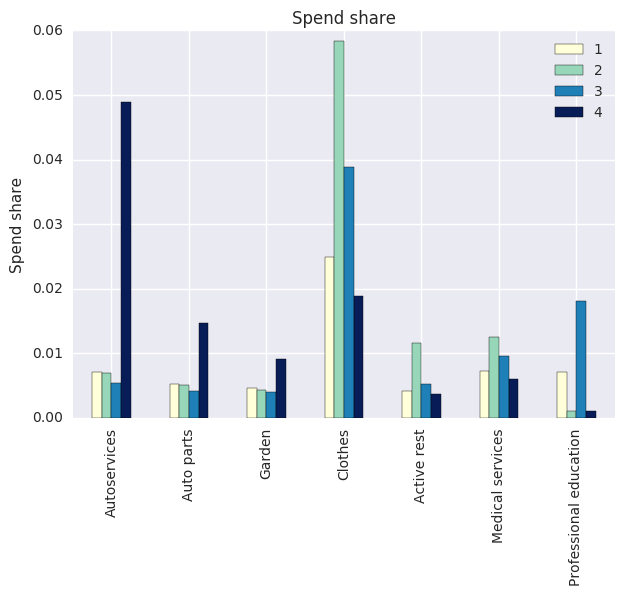

In [77]:
XX=final[final['final_labels']<5]
bar_data=np.zeros((7,4))
for i,col in enumerate(cols_for_presentation):
    #bar_data[0,i]=col
    X=XX[XX[col]!=0]
    for j in range(4):
        bar_data[i,j]=X.groupby('final_labels')[col].median().values[j]
bar_data=pd.DataFrame(bar_data, columns=range(5)[1:], index=cols_for_presentation)
#bar_data['columns']=txn_cols_amount

#bar_data=bar_data[(bar_data.ix[:,0:4].max(axis=1)>0.01)&(bar_data.ix[:,0:4].max(axis=1)<0.7)]
bar_data.plot(kind='bar', figsize=(7,5),cmap="YlGnBu" )
plt.ylabel('Spend share')
plt.title('Spend share')

Сравнение с affluent

In [ ]:
affluent['final_labels']=5

In [ ]:
XX=final[final['final_labels']<5].append(affluent)
bar_data=np.zeros((14,5))
for i,col in enumerate(amount_stat_large):
    #bar_data[0,i]=col
    X=XX[XX[col]!=0]
    for j in range(5):
        bar_data[i,j]=X.groupby('final_labels')[col].median().values[j]
bar_data=pd.DataFrame(bar_data, columns=range(6)[1:], index=amount_stat_large)
#bar_data['columns']=txn_cols_amount

#bar_data=bar_data[(bar_data.ix[:,0:4].max(axis=1)>0.01)&(bar_data.ix[:,0:4].max(axis=1)<0.7)]
bar_data.plot(kind='bar', figsize=(10,5),cmap="YlGnBu" )
plt.ylabel('Spend share')
plt.title('Spend share')

In [ ]:
XX=final[final['final_labels']<5]
bar_data=np.zeros((24,4))
for i,col in enumerate(amount_stat_little):
    #bar_data[0,i]=col
    X=XX[XX[col]!=0]
    for j in range(4):
        bar_data[i,j]=X.groupby('final_labels')[col].median().values[j]
bar_data=pd.DataFrame(bar_data, columns=range(5)[1:], index=amount_stat_little)
#bar_data['columns']=txn_cols_amount

#bar_data=bar_data[(bar_data.ix[:,0:4].max(axis=1)>0.01)&(bar_data.ix[:,0:4].max(axis=1)<0.7)]
bar_data.plot(kind='bar', figsize=(10,5), cmap="YlGnBu" )
plt.ylabel('Spend share')
plt.title('Spend share')

In [ ]:
XX=final[final['final_labels']<4]
bar_data=np.zeros((5,4))
for i,col in enumerate(count_stat_large):
    #bar_data[0,i]=col
    X=XX[XX[col]!=0]
    for j in range(4):
        bar_data[i,j]=X.groupby('final_labels')[col].median().values[j]
bar_data=pd.DataFrame(bar_data, columns=range(4), index=count_stat_large)
#bar_data['columns']=txn_cols_amount

#bar_data=bar_data[(bar_data.ix[:,0:4].max(axis=1)>0.01)&(bar_data.ix[:,0:4].max(axis=1)<0.7)]
bar_data.plot(kind='bar', figsize=(10,5))

In [ ]:
 XX=final[final['final_labels']<4]
bar_data=np.zeros((10,4))
for i,col in enumerate(count_stat_little):
    #bar_data[0,i]=col
    X=XX[XX[col]!=0]
    for j in range(4):
        bar_data[i,j]=X.groupby('final_labels')[col].median().values[j]
bar_data=pd.DataFrame(bar_data, columns=range(4), index=count_stat_little)
#bar_data['columns']=txn_cols_amount

#bar_data=bar_data[(bar_data.ix[:,0:4].max(axis=1)>0.01)&(bar_data.ix[:,0:4].max(axis=1)<0.7)]
bar_data.plot(kind='bar', figsize=(10,5))

In [ ]:
XX=final[final['final_labels']<4]
bar_data=np.zeros((10,4))
for i,col in enumerate(count_stat_little):
    #bar_data[0,i]=col
    X=XX[XX[col]!=0]
    for j in range(4):
        bar_data[i,j]=X.groupby('final_labels')[col].median().values[j]
bar_data=pd.DataFrame(bar_data, columns=range(4), index=count_stat_little)
#bar_data['columns']=txn_cols_amount

#bar_data=bar_data[(bar_data.ix[:,0:4].max(axis=1)>0.01)&(bar_data.ix[:,0:4].max(axis=1)<0.7)]
bar_data.plot(kind='bar', figsize=(10,5))

In [ ]:
#XX=final[final['final_labels']<4]
#f, axarr = plt.subplots(5, 3, figsize=(27,30))
#f.subplots_adjust(hspace=2)
#for i,col in enumerate(count_cols_stat):
 #   X=XX[XX[col]!=0]
  #  bar_data=[]
   # for j in range(4):
    #    bar_data.append(X.groupby('final_labels')[col].median().values[j])
    #bar_data=pd.DataFrame(bar_data, columns=[col]).transpose()

  #  _,stroka=math.modf(i/3) 
   # st=math.fmod(i,3)
    


    #bar_data.plot(kind='bar', ax=axarr[stroka,st], figsize=(27,0), use_index=False, title=col)


In [ ]:
XX=final[final['final_labels']<4]
for i,col in enumerate(count_cols_stat):
            print (col)
            for j in range(4):
                 print ('Cluster ',j, '{:.2f}'.format(XX.ix[(XX[col]!=0) & (XX['final_labels']==j),:].shape[0]/XX.ix[XX['final_labels']==j,:].shape[0]*100),'%')

## Корреляция внутри кластеров

In [ ]:
txn_cols_amount=list(txn_cols_amount)
for clust in range(4):
    X=final[final['final_labels']==clust]
    for i,col in enumerate(txn_cols_amount) :
        other= txn_cols_amount[i:]
        other.remove(col)
        for another in other:
            if pd.DataFrame(X[col]).corrwith(X[another])[0]>0.74:
                print (col,'   ',  another,'   ',   pd.DataFrame(X[col]).corrwith(X[another])[0])

In [ ]:
txn_cols_amount=list(txn_cols_count)
for clust in range(4):
    X=final[final['final_labels']==clust]
    for i,col in enumerate(txn_cols_amount) :
        other= txn_cols_amount[i:]
        other.remove(col)
        for another in other:
            if pd.DataFrame(X[col]).corrwith(X[another])[0]>0.74:
                print (col,'   ',  another,'   ',   pd.DataFrame(X[col]).corrwith(X[another])[0])

## Влияние города, семейного положения, пола на траты

### Во всей совокупности

In [ ]:
final.CU_GENDER.unique()[0]

**Пол**

In [ ]:
print ("Reject NULL hypothesis - Significant difference between groups.")
cols_gender=[]
for c in txn_cols_amount:   
    cols=[]
    cols.append(final.ix[final['CU_GENDER']==final.CU_GENDER.unique()[0], c])
    cols.append(final.ix[final['CU_GENDER']==final.CU_GENDER.unique()[1], c])
    H, pval = sc.stats.mannwhitneyu(cols[0],cols[1], alternative='two-sided')
    if pval < 0.05:
        cols_gender.append(c)
        print (c)
        

In [ ]:
for i,col in enumerate(count_stat_little):
    #bar_data[0,i]=col
    X=XX[XX[col]!=0]
    for j in range(4):
        bar_data[i,j]=X.groupby('final_labels')[col].median().values[j]

In [ ]:
X.groupby('CU_GENDER')['Alcohol and tobacco'].mean()

In [ ]:
XX=final
bar_data=np.zeros((len(cols_gender),2))
for i,col in enumerate(cols_gender):
    X=XX
    for j in range(2):
        bar_data[i,j]=X.groupby('CU_GENDER')[col].mean().values[j]
bar_data=pd.DataFrame(bar_data, columns=['M','F'], index=cols_gender)
bar_data=bar_data[(bar_data.ix[:,:].max(axis=1)>0.001)&(bar_data.ix[:,:].max(axis=1)<0.7)]
bar_data.plot(kind='bar', figsize=(10,5))

**Статус**

In [ ]:
print ("Reject NULL hypothesis - Significant difference between groups.")
cols_marital=[]
for c in txn_cols_amount:   
    cols=[]
    cols.append(final.ix[final['CU_MARITAL_STATUS']==final.CU_MARITAL_STATUS.unique()[0], c])
    cols.append(final.ix[final['CU_MARITAL_STATUS']==final.CU_MARITAL_STATUS.unique()[1], c])
    H, pval = sc.stats.mannwhitneyu(cols[0],cols[1], alternative='two-sided')
    if pval < 0.05:
        cols_marital.append(c)
        print (c)

In [ ]:
XX=final
bar_data=np.zeros((len(cols_marital),2))
for i,col in enumerate(cols_marital):
    X=XX
    for j in range(2):
        bar_data[i,j]=X.groupby('CU_GENDER')[col].mean().values[j]
bar_data=pd.DataFrame(bar_data, columns=['Married','Single'], index=cols_marital)
#bar_data=bar_data[(bar_data.ix[:,:].max(axis=1)<0.002)]
bar_data.plot(kind='bar', figsize=(10,5))

In [ ]:
X=final
for col in ['Sport','Pet shop', 'Toys']:
    if X.ix[X['CU_MARITAL_STATUS']==93267,col].mean()>0.00005 or X.ix[X['CU_MARITAL_STATUS']==7835,col].mean()>0.00005:
        fig, ax = plt.subplots(1)
        sns.boxplot(y =col, x='CU_MARITAL_STATUS', data=X)
        ax.set_ylim([0,X[col].quantile(0.95)])
        plt.show()

**Город**

In [ ]:
X=data_city.copy()
X[txn_cols_amount]=X[txn_cols_amount].div(X['active_months'], axis='index')
print ("Reject NULL hypothesis - Significant difference between groups.")
cols_city=[]
for c in txn_cols_amount:   
    cols=[]
    for i in range(4):
         cols.append(X.ix[X['city']==X.city.unique()[i], c])
    try:
        H, pval = sc.stats.mstats.kruskalwallis(cols[0],cols[1],cols[1],cols[2])
        if pval < 0.05:
            cols_city.append(c)
            print (c)
    except ZeroDivisionError:
        print('Всё')
        

In [ ]:
X=data_city.copy()
X[txn_cols_amount]=X[txn_cols_amount].div(X['active_months'], axis='index')
bar_data=np.zeros((len(cols_city),4))
for i,col in enumerate(cols_city):
    for j in range(4):
        bar_data[i,j]=X.groupby('city')[col].mean().values[j]
bar_data=pd.DataFrame(bar_data, columns=X.groupby('city')['Clothes'].mean().index.tolist(), index=cols_city)
#bar_data=bar_data[(bar_data.ix[:,:].max(axis=1)<0.002)]
bar_data.plot(kind='bar', figsize=(10,5))

### Внутри кластеров

In [ ]:
print ("Reject NULL hypothesis - Significant difference between groups.")
for j in range(4):
    X=final[final['final_labels']==j]
    print ('Cluster', j)
    for c in txn_cols_amount:   
        cols=[]
        cols.append(final.ix[final['CU_GENDER']==final.CU_GENDER.unique()[0], c])
        cols.append(final.ix[final['CU_GENDER']==final.CU_GENDER.unique()[1], c])
        H, pval = sc.stats.mannwhitneyu(cols[0],cols[1], alternative='greater')
        if pval < 0.05:
            print (c)

### Сравниваем мужчин и женщин из разных кластеров

In [ ]:
print ("Reject NULL hypothesis - Significant difference between groups.")
for j in range(2):
    X=final[final['CU_GENDER']==final.CU_GENDER.unique()[j]]
    print (final.CU_GENDER.unique()[j])
    for c in txn_cols_amount:   
        cols=[]
        for i in range(4):
            cols.append(final.ix[final['final_labels']==final.final_labels.unique()[i], c])
        try:
            H, pval = sc.stats.mannwhitneyu(cols[1], cols[3],alternative='less' )
            if pval < 0.05:
                 print (c)
        except ValueError:
            pass

### Сравниваем по семейному статусу 

In [ ]:
print ("Reject NULL hypothesis - Significant difference between groups.")
for j in range(2):
    X=final[final['CU_MARITAL_STATUS']==final.CU_MARITAL_STATUS.unique()[j]]
    print (final.CU_MARITAL_STATUS.unique()[j])
    for c in txn_cols_amount:   
        cols=[]
        for i in range(4):
            cols.append(final.ix[final['final_labels']==final.final_labels.unique()[i], c])
        
        H, pval = sc.stats.mannwhitneyu(cols[0], cols[2],alternative='less' )
        if pval < 0.05:
            print (c)

### Новые категориальные для heat map

In [ ]:
def make_conj(data, feature1, feature2, feature3):
    data[feature1+ '+' + feature2 + '+' + feature3]=data[feature1].astype(str) + '+' + data[feature2].astype(str)+ '+' + data[feature3].astype(str)
    return (data)

In [ ]:
final_city=final.copy()
final_city['city']=data_city['city'].values
final_city[['CU_GENDER', 'CU_MARITAL_STATUS']]=data_city[['CU_GENDER', 'CU_MARITAL_STATUS']].values

In [ ]:
final_city.head()

In [ ]:
final_city['CU_MARITAL_STATUS'].fillna('SINGLE',inplace=True )

In [ ]:
final_city=make_conj(final_city, 'CU_GENDER', 'CU_MARITAL_STATUS', 'city')

In [ ]:
#для применения критериев в выборке должно быть не меньше 30 человек
final_city.groupby('CU_GENDER+CU_MARITAL_STATUS+city').size()

In [ ]:
final_city['CU_GENDER+CU_MARITAL_STATUS+city'].unique()

In [ ]:
amount_cols_stat=kruskalwallis(txn_cols_amount, final_city, 'CU_GENDER+CU_MARITAL_STATUS+city')

In [ ]:
XX=final_city
for col in amount_cols_stat:
    #if data_analysis.ix[final['final_labels']==2,col].median()>500:
        X=XX[XX[col]!=0]
        fig, ax = plt.subplots(1, figsize=(25,10))
        sns.boxplot(y =col, x='CU_GENDER+CU_MARITAL_STATUS+city', data=X)
        ax.set_ylim([0,X[col].quantile(0.95)])
        
        plt.show()

In [ ]:
mannwhitneyu(txn_cols_amount, final_city,  0, 1, 'less', 'CU_GENDER+CU_MARITAL_STATUS+city')

In [ ]:
final_city['status+gender']=final_city['CU_GENDER'].astype(str) + '+' + final_city['CU_MARITAL_STATUS'].astype(str)

In [ ]:
young_raw_final=young_raw[young_raw.CIF_ID.isin(cif_avg)]

In [ ]:
final_city['salary']=young_raw_final['salary'].values

In [ ]:
sizes=final_city.groupby(['city', 'status+gender']).size().astype(str)
salary=np.around(np.array(final_city.groupby(['city', 'status+gender'])['salary'].median().values)).astype(int).astype(str)
annot=np.array([('Size  ' + coli+'\n'+ 'Salary ' + '\n' + colj) for i,coli in enumerate(sizes) for  j,colj in enumerate(salary) if i==j]).reshape((4,4))

In [ ]:
for col in amount_cols_stat:
    df = pd.DataFrame({'city':np.repeat(np.array(final_city.groupby(['city', 'status+gender'])[col].median().index.levels[0]),4), 
                       'status+gender':list(final_city.groupby(['city', 'status+gender'])[col].median().index.levels[1])*4, 
                       'value': final_city.groupby(['city', 'status+gender'])[col].median().values 
                     })
    pivot=df.pivot('city', 'status+gender', 'value')
    ax=sns.heatmap(pivot,  annot=annot, cmap="YlGnBu", fmt='s', cbar_kws={'label': 'median of spend share'})
    plt.title(col)
    plt.show()

In [ ]:
young_salary['city'].unique().shape[0]

In [ ]:
def category_heatmap(feature1, feature2,  X, cols):
    sizes=X.groupby([feature1, feature2]).size().values.astype(str).reshape((X[feature1].unique().shape[0],X[feature2].unique().shape[0]))
    #salary=np.around(np.array(young_salary.groupby([feature1, feature2])['salary'].median().values)).astype(int).astype(str)
    #annot=np.array([('Size  ' + coli+'\n'+ 'Salary ' + '\n' + colj) for i,coli in enumerate(sizes) for  j,colj in enumerate(salary) if i==j]).reshape((4,4))
    for col in cols:
        df = pd.DataFrame({feature1:np.repeat(np.array(X.groupby([feature1, feature2])[col].median().index.levels[0]),4), 
                           feature2:list(X.groupby([feature1, feature2])[col].median().index.levels[1])*4, 
                           'value': X.groupby([feature1, feature2])[col].median().values 
                          })
        pivot=df.pivot(feature1, feature2, 'value')
        ax=sns.heatmap(pivot,  annot=sizes, cmap="YlGnBu", fmt='s', cbar_kws={'label': 'median of spend share'})
        plt.title(col)
        plt.show()

In [ ]:
category_heatmap('city','status+gender', young_salary, amount_cols_stat)

In [ ]:
for col in txn_cols_amount:
    if final.ix[:,'L.PLOAN'].corr(final.ix[:,col])>0.75:
        print (col)

### Внутри кластеров

In [ ]:
for i in range(5)[1:]:
    X=final_city[final_city['final_labels']==i]
    sizes=X.groupby(['city', 'status+gender']).size().values.reshape((4,4))
    print ('Cluster'+str(i))
    for col in amount_cols_stat:
        df = pd.DataFrame({'city':np.repeat(np.array(X.groupby(['city', 'status+gender'])[col].median().index.levels[0]),4), 
                           'status+gender':list(X.groupby(['city', 'status+gender'])[col].median().index.levels[1])*4, 
                           'value': X.groupby(['city', 'status+gender'])[col].median().values 
                          })
        pivot=df.pivot('city', 'status+gender', 'value')
        ax=sns.heatmap(pivot,  annot=sizes, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'median of spend share'})
        plt.title(col)
        plt.show()

### Зарплата внутри портретных категорий

Нельзя рассматривать без дохода

In [ ]:
young_salary=pd.read_csv('young_ordinary.csv')
cif=pd.read_csv('cif_ordinary.csv')

In [ ]:
young_salary=cif.merge(young_salary,  left_index=True, right_index=True)

In [ ]:
young_salary=young_salary[young_salary['salary']>0]

In [ ]:
young_salary.shape

In [ ]:
young_salary.head()

In [ ]:
CIF_salary=young_salary['CIF_ID']
young_salary.drop(['Unnamed: 0_x', 'CIF_ID','Unnamed: 0_y'],axis=1, inplace=True)

In [ ]:
young_raw=pd.read_csv('dataset_2306.csv')

In [ ]:
young_raw_salary=young_raw[young_raw.CIF_ID.isin(CIF_salary)]

In [ ]:
young_raw_salary['city']='other'
with warn.catch_warnings():
        warn.simplefilter("ignore")

        young_raw_salary.ix[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Moscow','city']='Moscow'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='St.Peterburg'].index.tolist(),'city']='St.Peterburg'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Saint-Petersburg'].index.tolist(),'city']='St.Peterburg'

        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Samara'].index.tolist(),'city']='big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Nizhny Novgorod'].index.tolist(),'city']='big_city'
        young_raw_salary.ix[data_city[data_city['CU_BRANCH_CITY_TOWN']=='Ekaterinburg'].index.tolist(),'city']= 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Kazan'].index.tolist(),'city']= 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Krasnoyarsk'].index.tolist(),'city']= 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Ufa'].index.tolist(),'city']= 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Omsk'].index.tolist(),'city']='big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Volgograd'].index.tolist(),'city']= 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Voronezh'].index.tolist(),'city']= 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Rostov-na-Donu'].index.tolist(),'city']= 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Volgograd'].index.tolist(),'city'] = 'big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Novosibirsk'].index.tolist(),'city']='big_city'
        young_raw_salary.ix[young_raw_salary[young_raw_salary['CU_BRANCH_CITY_TOWN']=='Chelyabinsk'].index.tolist(),'city'] = 'big_city'

In [ ]:
young_salary['city']=young_raw_salary['city'].values
young_salary[['CU_GENDER', 'CU_MARITAL_STATUS']]=young_raw_salary[['CU_GENDER', 'CU_MARITAL_STATUS']].values

In [ ]:
young_salary['CU_MARITAL_STATUS'].fillna('SINGLE', inplace=True)

In [ ]:
young_salary['status+gender']=young_salary['CU_GENDER'].astype(str) + '+' + young_salary['CU_MARITAL_STATUS'].astype(str)

In [ ]:
young_salary.ix[:,txn_cols_amount]=young_salary.ix[:,txn_cols_amount].div(young_salary.ix[:,'active_months'], axis='index')
young_salary.ix[:,txn_cols_amount]=young_salary.ix[:,txn_cols_amount].div(young_salary.ix[:,'salary'], axis='index')

In [ ]:
sizes=young_salary.groupby(['city', 'status+gender']).size().values.astype(str)
salary=np.around(np.array(young_salary.groupby(['city', 'status+gender'])['salary'].median().values)).astype(int).astype(str)
annot=np.array([('Size  ' + coli+'\n'+ 'Salary ' + '\n' + colj) for i,coli in enumerate(sizes) for  j,colj in enumerate(salary) if i==j]).reshape((4,4))

In [ ]:
X=young_salary
for col in amount_cols_stat:
        df = pd.DataFrame({'city':np.repeat(np.array(X.groupby(['city', 'status+gender'])[col].median().index.levels[0]),4), 
                           'status+gender':list(X.groupby(['city', 'status+gender'])[col].median().index.levels[1])*4, 
                           'value': X.groupby(['city', 'status+gender'])[col].median().values 
                          })
        pivot=df.pivot('city', 'status+gender', 'value')
        ax=sns.heatmap(pivot,  annot=annot, cmap="YlGnBu", fmt='s', cbar_kws={'label': 'median of spend share'})
        plt.title(col)
        plt.show()

## Визуализация

### PCA

In [ ]:
svd = TruncatedSVD(2)
#scaler=StandardScaler(with_mean=0)
#lsa = make_pipeline(scaler,svd)

data_2d_pca = svd.fit_transform(young_enc)

In [ ]:
pca_2d=pd.DataFrame(np.hstack((data_2d_pca,final.final_labels.values.reshape((13196,1)))),columns=['1', '2', 'label'])

In [ ]:
plt.figure(figsize = (10, 6))
colors=['blue', 'green', 'yellow', 'red']
for i, c in enumerate(colors):
    data=pca_2d.ix[pca_2d.label==i,:]
    plt.scatter(data.ix[:, 0], data.ix[:, 1], label=i, c = c)
plt.legend()
    

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1],cmap='jet', c = final['final_labels'])
#plt.xlim((115,135))
plt.legend()
plt.title('n_clusters=4')

### t-SNE

In [ ]:
from sklearn import manifold

In [ ]:
sample_index=np.random.choice(young_ordinary_avg.index, 40000)
sample=young_ordinary_avg.ix[sample_index,:]
sample_labels=data_analysis.ix[sample_index,'final_labels']

In [ ]:
from sklearn import decomposition

In [ ]:
svd=decomposition.TruncatedSVD(n_components=50,random_state=0)
X=scaler.fit_transform(young_ordinary_avg)
X=svd.fit_transform(X)

In [ ]:
X=svd.fit_transform(young_enc)

In [ ]:
%%time
tsne = manifold.TSNE(n_components = 2, perplexity=80, random_state = 0)
data_2d_tsne = tsne.fit_transform(X)

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], cmap='prism' ,c = final['final_labels'])
plt.title('n_clusters=4')

## Коэффициент силуэта

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
svd = TruncatedSVD(80, random_state=1)
X=svd.fit_transform(young_enc)
cluster_labels = final['final_labels'] 
silhouette_score(X, cluster_labels)

In [ ]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)

In [ ]:
sample_silhouette_values[sample_silhouette_values>=0].shape

In [ ]:
svd=decomposition.TruncatedSVD(n_components=80,random_state=0)
X=svd.fit_transform(young_enc)
from __future__ import print_function


from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.cm as cm


print(__doc__)


import warnings

range_n_clusters = [3, 4, 5, 7]

for n_clusters in range_n_clusters:
   
    data_new_index=X
   
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        clusterer = cluster.MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, random_state=6)
        labels = clusterer.fit_predict(data_new_index)
    
    np.random.seed(0)
    
   
    cluster_labels = labels
    
    


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
     # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1)
    
     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([1, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
   

  

    plt.show()

# Статистика Хопкинса

In [ ]:
np.random.seed(1)
sample_index=np.random.choice(young_ordinary_avg.index, 3000)

In [ ]:
scaler=preprocessing.MinMaxScaler()
data_mM=young_enc.copy()
data_mM=scaler.fit_transform(data_mM.toarray())

In [ ]:
sample=data_mM[sample_index]

In [ ]:
X_rand = np.random.uniform(low=0,high=1,size=(sample.shape[0],sample.shape[1]))

In [ ]:
X_rand=pd.DataFrame(X_rand)

In [ ]:
X_rand.columns=['A'+str(i) for i in range(sample.shape[1])]

In [ ]:
knn=neighbors.NearestNeighbors(n_neighbors=2, n_jobs=-1)

In [ ]:
%%time
knn.fit(sample)
min_distance,_=knn.kneighbors(sample)
min_distance=min_distance[:,1]

In [ ]:
min_distance_rand,_=knn.kneighbors(X_rand)
min_distance_rand=min_distance_rand[:,0]

In [ ]:
H=np.sum(min_distance_rand)/(np.sum(min_distance_rand)+np.sum(min_distance))

If objects are uniformly distributed, qi and wi will be similar, and the statistic will be close to 0.5. If clustering are present, the distances for artificial objects will be larger than for the real ones, because these artificial objects are homogeneously distributed whereas the real ones are grouped together, and the value of H will increase. A value for H higher than 0.75 indicates a clustering tendency at the 90% confidence level

In [ ]:
H

# Hierarchical vs Kmeans

In [ ]:
#для one-hot
svd = TruncatedSVD(200, random_state=1)
X=svd.fit_transform(young_enc)

In [ ]:
kmeans=cluster.KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)
kmeans_labels=kmeans.predict(X)

In [ ]:
np.bincount(kmeans_labels)

In [ ]:
final_h=final.copy()
final_h['final_labels'].replace(3, 2 ,inplace=True)
final_h['final_labels'].replace(range(14)[5:], [1]*9 ,inplace=True)

In [ ]:
final_h.groupby('final_labels').size()

In [ ]:
print (metrics.homogeneity_score(final_h['final_labels'],kmeans_labels))
print (metrics.completeness_score(final_h['final_labels'],kmeans_labels))

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1],cmap='jet', c = kmeans_labels)
#plt.xlim((115,135))
plt.legend()
plt.title('n_clusters=4')

# DBSCAN

In [ ]:
#для one-hot
svd = TruncatedSVD(80, random_state=1)
X=svd.fit_transform(young_enc)

In [ ]:
#выбор радиуса
#%%time
knn=neighbors.NearestNeighbors(n_neighbors=6,n_jobs=-1)
knn.fit(X)
min_distance,_=knn.kneighbors(X)
min_distance=min_distance[:,5]

In [ ]:
nn5_dist = np.sort(min_distance)

In [ ]:
plt.plot(range(13196)[-2000:],nn5_dist[-2000:])

Плотностной алгоритм работает плохо. Ксластеры расположены слишком близко. Выбираем eps больше - всё сливается в один, меньше - много выбросов

In [ ]:
dbscan=cluster.DBSCAN(eps=7, min_samples=5)
dbs_labels=dbscan.fit_predict(X)

In [ ]:
pd.DataFrame(dbs_labels)[0].value_counts()

# MeanShift

In [ ]:
bandwidth = cluster.estimate_bandwidth(young_enc.toarray(), quantile=0.1)

In [ ]:
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
ms_labels=ms.fit_predict(X)

In [ ]:
pd.DataFrame(ms_labels)[0].value_counts()

In [ ]:
def linkage_and_params(fn):
        def  wrapper(self,Z,truncate_mode='lastp', p=30,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,annotate_above=10 ):
            Z=linkage(Z, 'ward')
            fn(self,Z,truncate_mode='lastp', p=30,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,annotate_above=10)
            plt.show()
        return wrapper
    
    
@linkage_and_params
def fancy_dendrogram(*args, **kwargs):
        max_d = kwargs.pop('max_d', None)
        if max_d and 'color_threshold' not in kwargs:
            kwargs['color_threshold'] = max_d
        annotate_above = kwargs.pop('annotate_above', 0)

        ddata = dendrogram(*args, **kwargs)

        if not kwargs.get('no_plot', False):
            plt.title('Hierarchical Clustering Dendrogram (truncated)')
            plt.xlabel('sample index or (cluster size)')
            plt.ylabel('distance')
            for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
                x = 0.5 * sum(i[1:3])
                y = d[1]
                if y > annotate_above:
                    plt.plot(x, y, 'o', c=c)
                    plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
            if max_d:
                plt.axhline(y=max_d, c='k')
        return ddata   

In [ ]:
a.fancy_dendrogram(X)

In [ ]:
class ClusterAnalysis:
    
    def __init__(self, X):
        self.data = X
    
    def corr(self,  cols, threshhold):
        other=cols.tolist()
        for i,col in enumerate(cols.tolist()) :
            other.remove(col)
            for another in other:
                corr=pd.DataFrame(self.data[col]).corrwith(self.data[another])[0]
                if corr>threshhold:
                    print (col,'   ',  another,'   ',  corr)
                
                
    def cat_features(self):
        cat_cols=[]
        for col in self.data.columns:
             if self.data[col].dtypes=='object':
                cat_cols.append(col)
        return cat_cols


    def binary_features(self):
        bin_cols=[]
        for col in self.data.columns:
            if len(self.data[col].unique())==2:
                bin_cols.append(col)
        return bin_cols 

    def feature_processing(self, cat_cols, bin_cols, real_cols):
    
        
        cat_indices = np.array([(column in cat_cols) for column in self.data.columns], dtype = bool)
    
        
        bin_indices = np.array([(column in bin_cols) for column in self.data.columns], dtype = bool)
    
        
        real_indices = np.array([(column in real_cols) for column in self.data.columns], dtype = bool)
    
        transform =  pipeline.FeatureUnion(transformer_list = [
            
                   ('binary', preprocessing.FunctionTransformer(lambda data: data[:, bin_indices])),
            
                   ('real', pipeline.Pipeline(steps = [
                           ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, real_indices])),
                           ('scaling', preprocessing.StandardScaler(with_mean=0))
                         ])),
                   ('categorical', pipeline.Pipeline(steps = [
                        ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, cat_indices])),
                        ('one_hot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
                        ]))
                   
                   
                        
                    ])
        
         
        X = transform.fit_transform(self.data)
        return X 
    
    def cluster_labels(self, X, threshold):
        Z = linkage(X, method='ward')
        h_labels=fcluster(Z, threshold , criterion='distance')
        final=self.data.copy()
        final['final_labels']=h_labels
        unique_labels=final['final_labels'].value_counts().index.tolist()
        final.final_labels.replace(unique_labels,[i+1 for i in range(len(unique_labels))],inplace=True)
        return final
    
    
    
    
    @linkage_and_params
    def fancy_dendrogram(self, *args, **kwargs):
        max_d = kwargs.pop('max_d', None)
        if max_d and 'color_threshold' not in kwargs:
            kwargs['color_threshold'] = max_d
        annotate_above = kwargs.pop('annotate_above', 0)

        ddata = dendrogram(*args, **kwargs)

        if not kwargs.get('no_plot', False):
            plt.title('Hierarchical Clustering Dendrogram (truncated)')
            plt.xlabel('sample index or (cluster size)')
            plt.ylabel('distance')
            for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
                x = 0.5 * sum(i[1:3])
                y = d[1]
                if y > annotate_above:
                    plt.plot(x, y, 'o', c=c)
                    plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
            if max_d:
                plt.axhline(y=max_d, c='k')
        return ddata
    
    
    def kruskalwallis(self,  X, columns, affect_feature):
        amount_cols_stat=[]
        print ("Reject NULL hypothesis - Significant difference between groups.")

        for c in columns:   
            cols=[]
            for i in X[affect_feature].unique():
                cols.append(X.ix[X[affect_feature]==i, c])
            try:
                H, pval = sc.stats.mstats.kruskalwallis(cols[0],cols[1], cols[2],cols[3])
                if pval < 0.05:
                    amount_cols_stat.append(c)
            except ValueError:
                pass
        return amount_cols_stat
    
    def mannwhitneyu(self, X, columns, k, l, alt,affect_feature):
        amount_cols_stat=[]
        print ("Reject NULL hypothesis - Significant difference between groups.")

        for c in columns:   
            cols=[]
            for i in np.sort(X[affect_feature].unique()):
                cols.append(X.ix[X[affect_feature]==i, c])
            try:
                H, pval = sc.stats.mannwhitneyu(cols[k],cols[l],alternative=alt)
                if pval < 0.05:
                    amount_cols_stat.append(c)
            except ValueError:
                pass
       
    def anova(self, columns,  affect_feature):
        print ("Reject NULL hypothesis - Significant difference between groups.")
        for c in columns:
            cols=[]
            for i in self.data[affect_feature].unique():
                cols.append(self.data.ix[self.data[affect_feature]==i, c])
            H, pval = sc.stats.f_oneway(cols[0],cols[1],cols[2],cols[3])

            if pval < 0.05:
                print (c)
                
    def city(self, ddata, city_col):
        ddata['city']='other'
        with warn.catch_warnings():
            warn.simplefilter("ignore")

            ddata.ix[ddata[city_col]=='Moscow','city']='Moscow'
            ddata.ix[ddata[ddata[city_col]=='St.Peterburg'].index.tolist(),'city']='St.Peterburg'
            ddata.ix[ddata[ddata[city_col]=='Saint-Petersburg'].index.tolist(),'city']='St.Peterburg'

            ddata.ix[ddata[ddata[city_col]=='Samara'].index.tolist(),'city']='big_city'
            ddata.ix[ddata[ddata[city_col]=='Nizhny Novgorod'].index.tolist(),'city']='big_city'
            ddata.ix[ddata[ddata[city_col]=='Ekaterinburg'].index.tolist(),'city']= 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Kazan'].index.tolist(),'city']= 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Krasnoyarsk'].index.tolist(),'city']= 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Ufa'].index.tolist(),'city']= 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Omsk'].index.tolist(),'city']='big_city'
            ddata.ix[ddata[ddata[city_col]=='Volgograd'].index.tolist(),'city']= 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Voronezh'].index.tolist(),'city']= 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Rostov-na-Donu'].index.tolist(),'city']= 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Volgograd'].index.tolist(),'city'] = 'big_city'
            ddata.ix[ddata[ddata[city_col]=='Novosibirsk'].index.tolist(),'city']='big_city'
            ddata.ix[ddata[ddata[city_col]=='Chelyabinsk'].index.tolist(),'city'] = 'big_city'
        return ddata
    
    def clust_personal_analytics(self, X, i, cols, label_col='final_labels'):
        with warn.catch_warnings():
            warn.simplefilter("ignore")
            Y=X[X[final_col]==i]
            for col in cols:
                X['avg_col']=X[col].map(Y.groupby(col).size()/X[X[label_col]==i].shape[0])  
                fig = plt.figure()
                sns.barplot(x=col,y='avg_col', data=X)
                plt.show()
                
    def crosstb_plot(self, X, feature1, feature2):

        ct=pd.crosstab(X[feature1], X[feature2],normalize=1)
        ct.plot(kind='bar', title=feature1, figsize=(8,5), cmap="YlGnBu")
        plt.xlabel('')
        plt.ylabel('share,%')
        plt.show()
     
    def box_plot(self,df, col1, col2,  non_zero=False):
        fig, ax = plt.subplots(1)
        if non_zero==False:
            X=df
        else:
            X=df[df[col1]!=0]
        sns.boxplot(y = col1, x=col2 , data=X)
        ax.set_ylim([0,X[col1].quantile(0.95)])
        plt.show()
        
        
    def barplot_analytics(self,df, cols, labels_col, n_clusters,title,non_zero=True):
        bar_data=np.zeros((len(cols),n_clusters))
        for i,col in enumerate(cols):
            if non_zero==False:
                X=df
            else:
                X=df[df[col]!=0]
            for j in range(n_clusters):
                bar_data[i,j]=X.groupby(labels_col)[col].median().values[j]
        bar_data=pd.DataFrame(bar_data, columns=range(n_clusters+1)[1:], index=cols)

        bar_data.plot(kind='bar', figsize=(10,5),cmap="YlGnBu" )
        plt.ylabel(title)
        plt.title(title)
        plt.show()
        
        
    def make_conj(self, X, feature1, feature2, feature3):
        X[feature1+ '+' + feature2 + '+' + feature3]=X[feature1].astype(str) + '+' + X[feature2].astype(str)+ '+' + X[feature3].astype(str)
        return (X) 
    
    def category_heatmap(self, feature1, feature2, cols):
        sizes=self.data.groupby([feature1, feature2]).size().values.astype(str).reshape((self.data[feature1].unique().shape[0],self.data[feature2].unique().shape[0]))
        #salary=np.around(np.array(young_salary.groupby([feature1, feature2])['salary'].median().values)).astype(int).astype(str)
        #annot=np.array([('Size  ' + coli+'\n'+ 'Salary ' + '\n' + colj) for i,coli in enumerate(sizes) for  j,colj in enumerate(salary) if i==j]).reshape((4,4))
        for col in cols:
            df = pd.DataFrame({feature1:np.repeat(np.array(self.data.groupby([feature1, feature2])[col].median().index.levels[0]),self.data[feature2].unique().shape[0]), 
                               feature2:list(self.data.groupby([feature1, feature2])[col].median().index.levels[1])*self.data[feature1].unique().shape[0], 
                              'value': self.data.groupby([feature1, feature2])[col].median().values 
                              })
            pivot=df.pivot(feature1, feature2, 'value')
            ax=sns.heatmap(pivot,  annot=sizes, cmap="YlGnBu", fmt='s', cbar_kws={'label': 'median of spend share'})
            plt.title(col)
            plt.show()
            
    def pca_visualization(self, X, n_clusters):
        svd = preprocessing.TruncatedSVD(2)
        data_2d_pca = svd.fit_transform(X)
        plt.figure(figsize = (10, 6))
        plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1],cmap='jet', c = final['final_labels'])
        #plt.xlim((115,135))
        #plt.legend()
        plt.title('n_clusters=', n_clusters)    
        plt.show()
        
        
    def tSNE_sample(self, X, label_col, sample_size, svd_num_components):
        sample_index=np.random.choice(X.index, sample_size)
        sample=data.ix[sample_index,:]
        sample_labels=data.ix[sample_index,label_col]
        svd=decomposition.TruncatedSVD(n_components=svd_num_components,random_state=0)
        X=svd.fit_transform(data)
        tsne = manifold.TSNE(n_components = 2, perplexity=80, random_state = 0)
        data_2d_tsne = tsne.fit_transform(X)
        plt.figure(figsize = (10, 6))
        plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], cmap='prism' ,c = final['final_labels'])
        #plt.title('n_clusters=4')
        pl.show()
        
        
    def silhouette_score_plot(self, X, range_n_clusters):
        

        print(__doc__)


        import warnings

    
        for n_clusters in range_n_clusters:
   
               data_new_index=X
   
               with warnings.catch_warnings():
                  warnings.simplefilter("ignore")
                  clusterer = cluster.MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, random_state=6)
                  labels = clusterer.fit_predict(data_new_index)
    
               np.random.seed(0)
    
   
               cluster_labels = labels
    

               # The silhouette_score gives the average value for all the samples.
               # This gives a perspective into the density and separation of the formed
               # clusters
               silhouette_avg = silhouette_score(X, cluster_labels)
               sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
            # Create a subplot with 1 row and 2 columns
               fig, ax = plt.subplots(1)
    
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        #  lie within [-0.1, 1]
               ax.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
               ax.set_ylim([1, len(X) + (n_clusters + 1) * 10])


               y_lower = 10
               for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
                 ith_cluster_silhouette_values = \
                 sample_silhouette_values[cluster_labels == i]

                 ith_cluster_silhouette_values.sort()

                 size_cluster_i = ith_cluster_silhouette_values.shape[0]
                 y_upper = y_lower + size_cluster_i

                 color = cm.spectral(float(i) / n_clusters)
                 ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
                 ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
                 y_lower = y_upper + 10  # 10 for the 0 samples

        ax.set_title("The silhouette plot for the various clusters.")
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
 
        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
        plt.show()  
        
       
    def Hopkins(self, sample_size):
        scaler=preprocessing.MinMaxScaler()
        data_mM=self.data.copy()
        data_mM=scaler.fit_transform(data_mM.toarray())
    
        np.random.seed(1)
        sample_index=np.random.choice(young_ordinary_avg.index, sample_size)
        sample=data_mM[sample_index]
        X_rand = pd.DataFrame(np.random.uniform(low=0,high=1,size=(sample.shape[0],sample.shape[1])))
    
    
        knn=neighbors.NearestNeighbors(n_neighbors=2, n_jobs=-1)
        knn.fit(sample)
        min_distance,_=knn.kneighbors(sample)
        min_distance=min_distance[:,1]
    
        min_distance_rand,_=knn.kneighbors(X_rand)
        min_distance_rand=min_distance_rand[:,0]
    
        H=np.sum(min_distance_rand)/(np.sum(min_distance_rand)+np.sum(min_distance))
    
        print ("If objects are uniformly distributed, qi and wi will be similar, and the statistic will be close to 0.5. If clustering are present, the distances for artificial objects will be larger than for the real ones, because these artificial objects are homogeneously distributed whereas the real ones are grouped together, and the value of H will increase. A value for H higher than 0.75 indicates a clustering tendency at the 90% confidence level")
        return H

In [ ]:
X=young_ordinary_avg.copy()

In [ ]:
X['CU_BRANCH_CITY_TOWN']=young_raw['CU_BRANCH_CITY_TOWN']

In [ ]:
X['CU_BRANCH_CITY_TOWN'].unique()

In [ ]:
a=ClusterAnalysis(X)

In [ ]:
cat_cols=['CU_BRANCH_CITY_TOWN']
bin_cols=a.binary_features()
real_cols=list(set(X.columns)-set(cat_cols)-set(bin_cols))

In [ ]:
new=a.feature_processing(cat_cols, bin_cols, real_cols).toarray()

In [ ]:
final = a.cluster_labels(X, 162)

In [ ]:
a.kruskalwallis(final, txn_cols_amount, 'final_labels')

In [ ]:
final_city=a.city(young_raw, 'CU_BRANCH_CITY_TOWN')

In [ ]:
a.crosstb_plot(final_city, 'CU_GENDER', 'city')

In [ ]:
a.box_plot(final, 'Clothes', 'final_labels')

In [ ]:
a.barplot_analytics(final,txn_cols_amount, 'final_labels', 3, 'afff',non_zero=False)

In [ ]:
a=[1,2]
a*4

In [ ]:
a.category_heatmap('CU_GENDER', 'CU_MARITAL_STATUS', txn_cols_amount)